# Text Data Visualization in Python

The best way to understand any data is by visualizing it. if I give you a table load of data and Charts then the latter is more easier way to get insight from the data. Visualization is a critical part of any data analysis project and makes it easy to understand the significance of data in a visual way by looking at  visuals and quickly helps to identify the areas which needs attention and helps to build a strategy for further Data Science activity.

Text Visualization has always been a challenging task as it needs to be converted into numerical features first which computers can understand, which is tricky because text is discrete

**Whats is Scattertext ?**

This is a tool that’s intended for visualizing what words and phrases are more characteristic of a category than others

**Installation**

In [6]:
pip install scattertext

     |████████████████████████████████| 6.7MB 105kB/s 


**Overview**

We are going to use 2012 political convention data set and visualize what are the most frequent words used by Republican and Democrats Candidates

**Import**

In [7]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))

**Load Spacy Language Model**

For this step you have to ensure that spacy is installed on your computer and then you load the english language model

In [0]:
import spacy
nlp = spacy.load('en')

**Load Data in Pandas Dataframe**

In [0]:
convention_df = st.SampleCorpora.ConventionData2012.get_data()

In [0]:
print(convention_df)

          party  ...                                               text
0      democrat  ...  Thank you. Thank you. Thank you. Thank you so ...
1      democrat  ...  Thank you so much. Tonight, I am so thrilled a...
2      democrat  ...  Thank you. It is a singular honor to be here t...
3      democrat  ...  Hey, Delaware. \nAnd my favorite Democrat, Jil...
4      democrat  ...  Hello. \nThank you, Angie. I'm so proud of how...
5      democrat  ...  My name is Angie Flores and I am a student at ...
6      democrat  ...  Today and every day, our military men and wome...
7      democrat  ...  Thank you. Thank you.\nIn this — in this campa...
8      democrat  ...  Good evening. \nHalf a century ago, Ronald Rea...
9      democrat  ...  Settle down. Settle down.\nI know Mitt Romney....
10     democrat  ...  Hello, Charlotte! I've got to tell you, I have...
11     democrat  ...  Good evening. I'm Jennifer Granholm from the g...
12     democrat  ...  You all having a good time? \nThat's Barac

**Parse Speech text using Spacy**

SpaCy features a fast and accurate syntactic dependency parser, and has a rich API for navigating the tree. The parser also powers the sentence boundary detection, and lets you iterate over base noun phrases, or “chunks”.

In [0]:
	
convention_df['parsed'] = convention_df.text.apply(nlp)

In [11]:
convention_df.head()

,party,speaker,text,parsed
0,democrat,BARACK OBAMA,Thank you. Thank you. Thank you. Thank you so ...,"(Thank, you, ., Thank, you, ., Thank, you, ., ..."
1,democrat,MICHELLE OBAMA,"Thank you so much. Tonight, I am so thrilled a...","(Thank, you, so, much, ., Tonight, ,, I, am, s..."
2,democrat,RICHARD DURBIN,Thank you. It is a singular honor to be here t...,"(Thank, you, ., It, is, a, singular, honor, to..."
3,democrat,JOSEPH BIDEN,"Hey, Delaware. \nAnd my favorite Democrat, Jil...","(Hey, ,, Delaware, ., \n, And, my, favorite, D..."
4,democrat,JILL BIDEN,"Hello. \nThank you, Angie. I'm so proud of how...","(Hello, ., \n, Thank, you, ,, Angie, ., I, 'm,..."


**Count of Democrats and Republicants**

In [12]:
print("Document Count")
print(convention_df.groupby('party')['text'].count())
print("Word Count")
convention_df.groupby('party').apply(lambda x: x.text.apply(lambda x: len(x.split())).sum())

Document Count
party
democrat      123
republican     66
Name: text, dtype: int64
Word Count


party
democrat      76843
republican    58144
dtype: int64

**Convert Dataframe into Scattertext Corpus**

This is an essential step to reprsent the dataframe as Scattertext corpus which is an essential parameters for some of the functions that we are going to see in next steps

In [0]:
corpus = st.CorpusFromParsedDocuments(convention_df, category_col='party', parsed_col='parsed').build()

**Visualize Chart**

In [0]:
html = produce_scattertext_explorer(corpus,
                                    category='democrat',
                                    category_name='Democratic',
                                    not_category_name='Republican',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.scale,
                                    metadata=convention_df['speaker'])
open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'))
from google.colab import files
files.download('Convention-Visualization.html')

This shows the Top 10 most frequent used words by Republican and Democrats candidates and how frequently each words are used per 25k words and what’s it’s tf-idf score

Another one

In [0]:
html = st.produce_scattertext_explorer(corpus,
...          category='democrat',
...          category_name='Democratic',
...          not_category_name='Republican',
...          width_in_pixels=1000,
...          metadata=convention_df['speaker'])
open("Convention-Visualization2.html", 'wb').write(html.encode('utf-8'))
from google.colab import files
files.download('Convention-Visualization2.html')
#IFrame("Convention-Visualization2.html", width = 1200, height=700)

# Build Knowledge Graph from Data text

In [0]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [18]:
import pandas as pd
url = 'http://bit.ly/BD32-PHN'
#url = 'https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/10/wiki_sentences_v2.csv'
candidate_sentences = pd.read_csv(url)
candidate_sentences.shape

(4318, 1)

In [0]:
candidate_sentences['sentence'].sample(5)

302                                                          the music was limited to orlova's singing.
3532                                             odisha has a history of filmmaking, starting from1936.
2408    first indigenously produced 70 mm film, while  my dear kuttichathan  was india's first 3d film.
1095                                                                                    he attended st.
2707                                                                  paul, which is still in business.
Name: sentence, dtype: object

Let’s check the subject and object of one of these sentences. Ideally, there should be one subject and one object in the sentence:

In [19]:
doc = nlp("the drawdown process is governed by astm standard d823")

for tok in doc:
  print(tok.text, "...", tok.dep_)

the ... det
drawdown ... compound
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... pobj
d823 ... punct


Perfect! There is only one subject (‘process’) and only one object (‘standard’). You can check for other sentences in a similar manner.

**Entity Pairs Extraction**

In [0]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

Let me explain the code chunks in the function above:

Chunk 1

I have defined a few empty variables in this chunk. prv_tok_dep and prv_tok_text will hold the dependency tag of the previous word in the sentence and that previous word itself, respectively. prefix and modifier will hold the text that is associated with the subject or the object.

Chunk 2

Next, we will loop through the tokens in the sentence. We will first check if the token is a punctuation mark or not. If yes, then we will ignore it and move on to the next token. If the token is a part of a compound word (dependency tag = “compound”), we will keep it in the prefix variable. A compound word is a combination of multiple words linked to form a word with a new meaning (example – “Football Stadium”, “animal lover”).

As and when we come across a subject or an object in the sentence, we will add this prefix to it. We will do the same thing with the modifier words, such as “nice shirt”, “big house”, etc.

Chunk 3

Here, if the token is the subject, then it will be captured as the first entity in the ent1 variable. Variables such as prefix, modifier, prv_tok_dep, and prv_tok_text will be reset.

Chunk 4

Here, if the token is the object, then it will be captured as the second entity in the ent2 variable. Variables such as prefix, modifier, prv_tok_dep, and prv_tok_text will again be reset.

Chunk 5

Once we have captured the subject and the object in the sentence, we will update the previous token and its dependency tag.

Let’s test this function on a sentence:

In [21]:
get_entities("the film had 200 patents")

['film', '200  patents']

Great, it seems to be working as planned. In the above sentence, ‘film’ is the subject and ‘200 patents’ is the object.

Now we can use this function to extract these entity pairs for all the sentences in our data:

In [22]:
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 4318/4318 [00:44<00:00, 97.20it/s]


The list entity_pairs contains all the subject-object pairs from the Wikipedia sentences. Let’s have a look at a few of them:

In [23]:
entity_pairs[10:20]

[['we', 'tests'],
 ['global', 'international sales rights'],
 ['robbie  robertson', 'soundtrack'],
 ['it', 'original music tracks'],
 ['it', 'reviewed  franchise'],
 ['she', 'accidentally  mystique'],
 ['military  forces', 'arrest'],
 ['train', 'vuk'],
 ['kota eberhardt', 'telepath selene gallio'],
 ['singer', 'sequel']]

**Relation / Predicate Extraction**

This is going to be a very interesting aspect of this article. Our hypothesis is that the predicate is actually the main verb in a sentence.

For example, in the sentence – “Sixty Hollywood musicals were released in 1929”, the verb is “released in” and this is what we are going to use as the predicate for the triple generated from this sentence.

The function below is capable of capturing such predicates from the sentences. Here, I have used spaCy’s rule-based matching:

In [0]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

The pattern defined in the function tries to find the ROOT word or the main verb in the sentence. Once the ROOT is identified, then the pattern checks whether it is followed by a preposition (‘prep’) or an agent word. If yes, then it is added to the ROOT word.
Let me show you a glimpse of this function:

In [32]:
get_relation("John completed the task")

'completed'

Similarly, let’s get the relations from all the Wikipedia sentences:

In [0]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

 40%|███▉      | 1713/4318 [00:17<00:24, 105.61it/s]

Let’s take a look at the most frequent relations or predicates that we have just extracted:

In [27]:
pd.Series(relations).value_counts()[:50]

is               368
was              283
released on       79
are               72
include           69
were              63
's                42
released          41
has               30
have              30
composed by       29
became            29
released in       28
become            28
considered        22
included          21
produced          19
called            19
be                19
had               19
stars             18
used              18
been              18
scheduled         17
made              16
directed by       15
hired             14
wrote             14
went              14
set               14
introduced in     13
received          13
written by        13
wanted            12
sold              12
cast as           11
won               11
features          10
produced by       10
gave              10
began in          10
began             10
includes          10
used in            9
opened             9
shot in            9
gives              9
reported     

It turns out that relations like “A is B” and “A was B” are the most common relations. However, there are quite a few relations that are more associated with the overall theme – “the ecosystem around movies”. Some of the examples are “composed by”, “released in”, “produced”, “written by” and a few more.

** Build a Knowledge Graph**

We will finally create a knowledge graph from the extracted entities (subject-object pairs) and the predicates (relation between entities).

Let’s create a dataframe of entities and predicates:

In [0]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

Next, we will use the networkx library to create a network from this dataframe. The nodes will represent the entities and the edges or connections between the nodes will represent the relations between the nodes.

It is going to be a directed graph. In other words, the relation between any connected node pair is not two-way, it is only from one node to another. For example, “John eats pasta”:

In [0]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

Let's plot the network

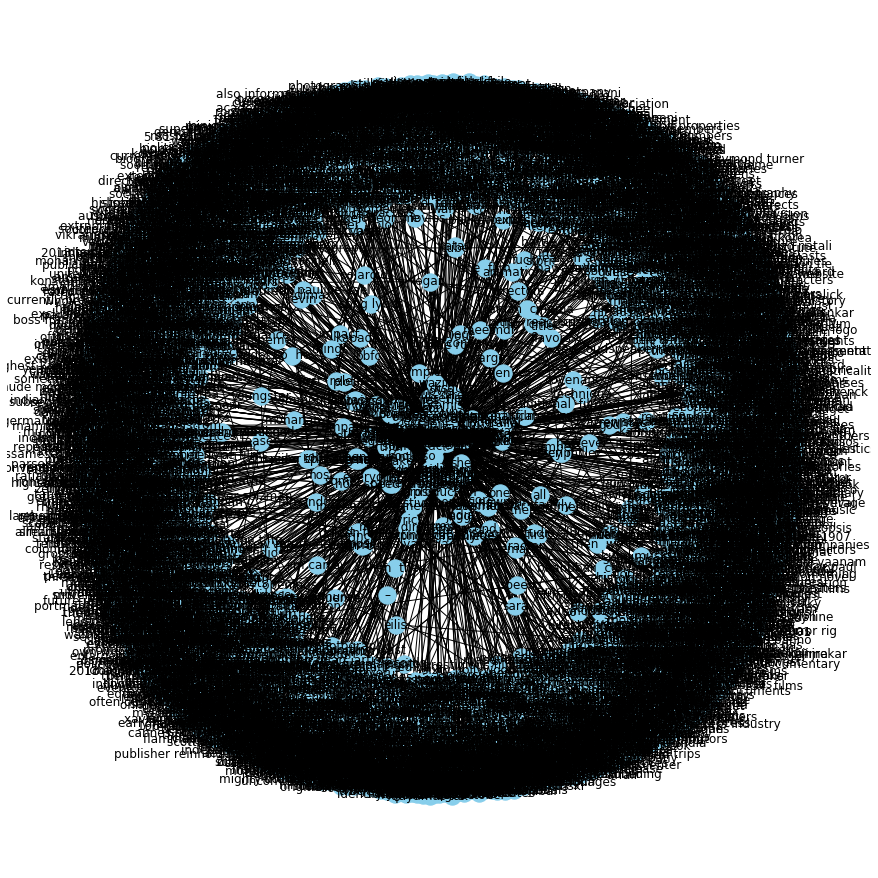

In [30]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Well, this is not exactly what we were hoping for (still looks quite a sight though!).

It turns out that we have created a graph with all the relations that we had. It becomes really hard to visualize a graph with these many relations or predicates.

So, it’s advisable to use only a few important relations to visualize a graph. I will take one relation at a time. Let’s start with the relation “composed by”:

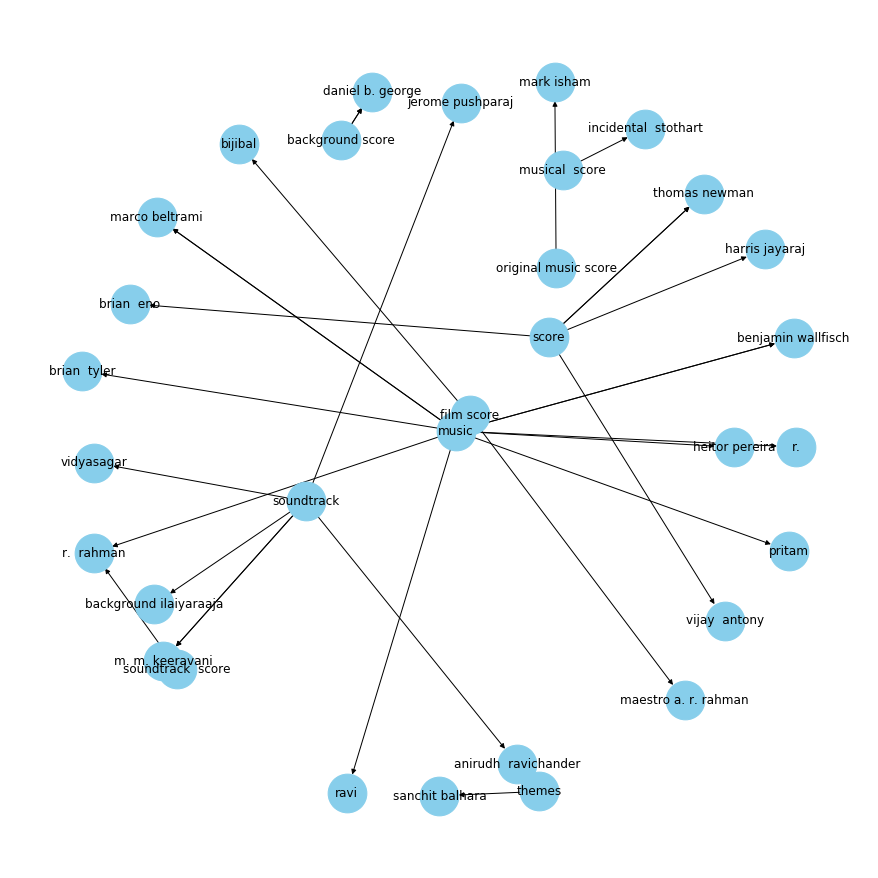

In [0]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

That’s a much cleaner graph. Here the arrows point towards the composers. For instance, A.R. Rahman, who is a renowned music composer, has entities like “soundtrack score”, “film score”, and “music” connected to him in the graph above.

Let’s check out a few more relations.

Since writing is an important role in any movie, I would like to visualize the graph for the “written by” relation:

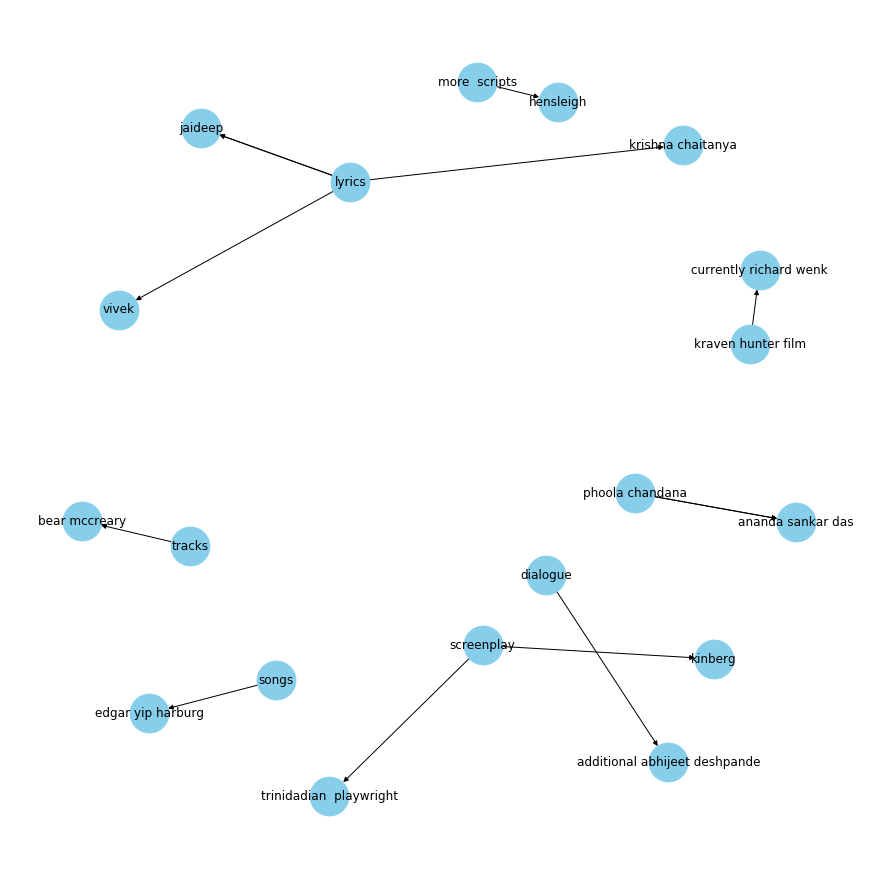

In [0]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Awesome! This knowledge graph is giving us some extraordinary information. Guys like Javed Akhtar, Krishna Chaitanya, and Jaideep Sahni are all famous lyricists and this graph beautifully captures this relationship.

Let’s see the knowledge graph of another important predicate, i.e., the “released in”:

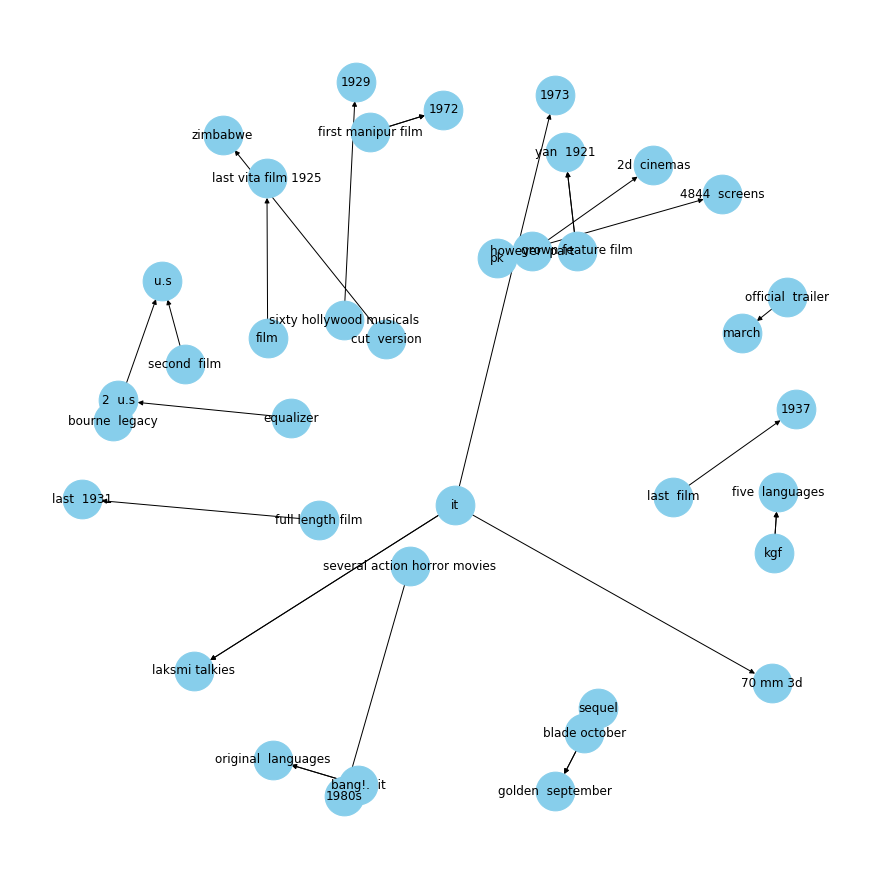

In [0]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

 can see quite a few interesting information in this graph. For example, look at this relationship – “several action horror movies released in the 1980s” and “pk released on 4844 screens”. These are facts and it shows us that we can mine such facts from just text. That’s quite amazing!